In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import healpy as hp

In [3]:
d2r = np.pi / 180.
lonc = 107.2
latc = 5.2
lonra = [lonc-1.5, lonc+1.5]
latra = [latc-1.5, latc+1.5]

In [4]:
irisfiles = ['../externaldata/IRIS_nohole_1_2048.fits', \
            '../externaldata/IRIS_nohole_2_2048.fits', \
            '../externaldata/IRIS_nohole_3_2048.fits', \
            '../externaldata/IRIS_nohole_4_2048.fits']
irisfreqs = np.array([25000, 12000, 5000, 3000]) * 1.e9
irisbeams = np.array([3.8, 3.8, 4.0, 4.3])

In [5]:
for k, pf in enumerate(irisfiles):
    irismap = hp.read_map(pf, verbose=False)
    mask = irismap == -32768
    irismap[mask] = hp.UNSEEN
    mask = np.isnan(irismap)
    irismap[mask] = hp.UNSEEN
    newbeam = np.sqrt(40.**2 - irisbeams[k]**2) / 60.
    irismap = hp.ud_grade(hp.smoothing(irismap, fwhm=newbeam*d2r), 512)
    nside = hp.get_nside(irismap)
    irismap *= 1.e6 * hp.nside2pixarea(nside)
    name = '/home/mabitbol/GBT-S140/externaldata/iris_smoothed_'+str(int(irisfreqs[k]*1e-9))+'_40.fits'
    hp.write_map(name, irismap)

/home/mabitbol/.local/lib/python2.7/site-packages/healpy/pixelfunc.py:249: RuntimeWarning: invalid value encountered in less_equal
  return np.absolute(m - badval) <= atol + rtol * np.absolute(badval)


Sigma is 16.909611 arcmin (0.004919 rad) 
-> fwhm is 39.819091 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 16.909611 arcmin (0.004919 rad) 
-> fwhm is 39.819091 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 16.901290 arcmin (0.004916 rad) 
-> fwhm is 39.799497 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 16.888001 arcmin (0.004913 rad) 
-> fwhm is 39.768203 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


In [ ]:
xx = hp.read_map('../externaldata/ir')
vecc = hp.rotator.dir2vec(lonc, latc, lonlat=True)
rmask = hp.query_disc(nside, vecc, (60./60.)*d2r, inclusive=False)
amaskout = set(hp.query_disc(nside, vecc, (100./60.)*d2r, inclusive=False))
amaskin = set(hp.query_disc(nside, vecc, (80./60.)*d2r, inclusive=False))
amask = np.array(list(amaskout.difference(amaskin)))
rdata = xx[rmask]
adata = xx[amask]
flux = np.sum(rdata - np.median(adata))
rms = np.std(adata) * np.sqrt(len(rdata) + pi/2. * float(len(rdata)**2) / len(adata))
print flux, rms

In [7]:
z = hp.read_map('../externaldata/IRIS_nohole_1_2048.fits')
mask = z == -32768
z[mask] = hp.UNSEEN
mask = np.isnan(z)
z[mask] = hp.UNSEEN
z = hp.smoothing(hp.ud_grade(z, 512), fwhm=1.*np.pi/180., verbose=False)

NSIDE = 2048
ORDERING = RING in fits file


/home/mabitbol/.local/lib/python2.7/site-packages/healpy/pixelfunc.py:249: RuntimeWarning: invalid value encountered in less_equal
  return np.absolute(m - badval) <= atol + rtol * np.absolute(badval)


Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


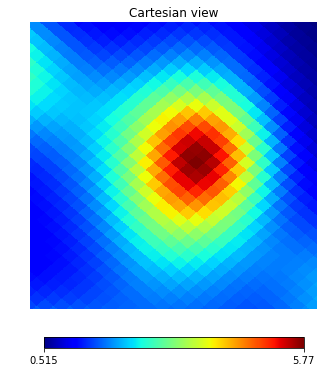

In [8]:
hp.cartview(z, lonra=lonra, latra=latra)

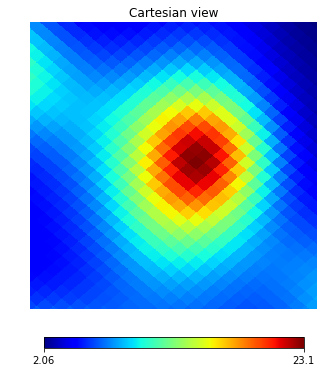

In [18]:
hp.cartview(irismap, lonra=lonra, latra=latra)

In [9]:
def iris_flux(iris, inside=60., outside=90., radius=60.):
    z = hp.read_map(iris)
    mask = z == -32768
    z[mask] = hp.UNSEEN
    mask = np.isnan(z)
    z[mask] = hp.UNSEEN
    z = hp.ud_grade(hp.smoothing(z, fwhm=1.*np.pi/180., verbose=False), 512)
    
    nside = hp.get_nside(z)
    vecc = hp.rotator.dir2vec(lonc, latc, lonlat=True)
    rmask = hp.query_disc(nside, vecc, (radius/60.)*d2r, inclusive=False)
    amaskout = set(hp.query_disc(nside, vecc, (outside/60.)*d2r, inclusive=False))
    amaskin = set(hp.query_disc(nside, vecc, (inside/60.)*d2r, inclusive=False))
    amask = np.array(list(amaskout.difference(amaskin)))
    
    y = z * hp.nside2pixarea(nside) * 1.e6
    
    rdata = y[rmask]
    adata = y[amask]
    flux = np.sum(rdata - np.median(adata))
    rms = np.std(adata) * np.sqrt(len(rdata) + pi/2. * float(len(rdata)**2) / len(adata))
    print flux, rms

In [7]:
3e8 / (12e-6) * 1e-9

25000.0

In [10]:
3e8 / (25e-6) * 1e-9

12000.0

In [11]:
3e8 / (60e-6) * 1e-9

5000.0

In [12]:
3e8 / (100e-6) * 1e-9

3000.0

In [11]:
irisfiles = ['../externaldata/IRIS_nohole_1_2048.fits', \
            '../externaldata/IRIS_nohole_2_2048.fits', \
            '../externaldata/IRIS_nohole_3_2048.fits', \
            '../externaldata/IRIS_nohole_4_2048.fits']
irisfreqs = np.array([25000, 12000, 5000, 3000]) * 1.e9
irisbeams = np.array([3.8, 3.8, 4.0, 4.3])

In [12]:
irismap = hp.read_map(irisfiles[0], verbose=False)
mask = irismap == -32768
irismap[mask] = hp.UNSEEN
mask = np.isnan(irismap)
irismap[mask] = hp.UNSEEN
newbeam = np.sqrt(60.**2 - irisbeams[k]**2) / 60.
irismap = hp.ud_grade(hp.smoothing(irismap, fwhm=newbeam*d2r), 512)
nside = hp.get_nside(irismap)
irismap *= 1.e6 * hp.nside2pixarea(nside)

Sigma is 25.414137 arcmin (0.007393 rad) 
-> fwhm is 59.845718 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


In [23]:
vecc = hp.rotator.dir2vec(lonc, latc, lonlat=True)
rmask = hp.query_disc(nside, vecc, (60./60.)*d2r, inclusive=False)
amaskout = set(hp.query_disc(nside, vecc, (100./60.)*d2r, inclusive=False))
amaskin = set(hp.query_disc(nside, vecc, (80./60.)*d2r, inclusive=False))
amask = np.array(list(amaskout.difference(amaskin)))

In [24]:
vecc = hp.rotator.dir2vec(lonc, latc, lonlat=True)
rmask = hp.query_disc(nside, vecc, (60./60.)*d2r, inclusive=False)
amaskout = set(hp.query_disc(nside, vecc, (100./60.)*d2r, inclusive=False))
amaskin = set(hp.query_disc(nside, vecc, (80./60.)*d2r, inclusive=False))
amask = np.array(list(amaskout.difference(amaskin)))
rdata = irismap[rmask]
adata = irismap[amask]
flux = np.sum(rdata - np.median(adata))
rms = np.std(adata) * np.sqrt(len(rdata) + pi/2. * float(len(rdata)**2) / len(adata))
print flux, rms

1926.64137752 38.4424715463


In [10]:
# 1 is 12um, 2 is 25um, 3 is 60um, 4 is 100um
iris_flux('../externaldata/IRIS_nohole_1_2048.fits', inside=80, outside=100)

NSIDE = 2048
ORDERING = RING in fits file
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
1923.25363566 38.3742194502


In [48]:
np.sqrt(38**2 + (0.05*1922)**2)

103.34026320849004

In [43]:
# 1 is 12um, 2 is 25um, 3 is 60um, 4 is 100um
iris_flux('../externaldata/IRIS_nohole_2_2048.fits', inside=80, outside=100)

NSIDE = 2048
ORDERING = RING in fits file
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
4148.97673886 63.0260930393


In [45]:
np.sqrt(63**2 + (0.15*4149)**2)

625.53059277704392

In [49]:
# 1 is 12um, 2 is 25um, 3 is 60um, 4 is 100um
iris_flux('../externaldata/IRIS_nohole_3_2048.fits', inside=80, outside=100)

NSIDE = 2048
ORDERING = RING in fits file
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
25144.9458576 308.645978192


In [51]:
np.sqrt(308**2 + (0.10*25144)**2)

2533.1939049350331

In [52]:
# 1 is 12um, 2 is 25um, 3 is 60um, 4 is 100um
iris_flux('../externaldata/IRIS_nohole_4_2048.fits', inside=80, outside=100)

NSIDE = 2048
ORDERING = RING in fits file
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
52436.9051048 917.853399304


In [53]:
np.sqrt(917**2 + (0.135*52436)**2)

7138.007277917276